# Using Libraries for ML and AI

The reason why we implemented logistic regression and a simple neural network from scratch was to understand the internals of these methods. In practice, there are excellent libraries and frameworks that you can rely on for ML and AI instead of coding them from scratch. 

We will introduce you to two such libraries - scikit learn and pytorch. In this assignment, you will use scikit learn (which is sort of the default choice in python for a machine learning library) for logistic regression and pytorch for neural networks.. While there are several popular deep learning frameworks like pytorch, keras, tensorflow, and so on, we will choose pytorch in this assignment since the fast.ai library that you will be using in the next set of exercise is built on top of pytorch. However, you are free to use any deep learning framework you like since the underlying concepts are fairly similar.

The main task for you in this assignment is to familiarize yourself and learn how to use these standard libraries. Please go through the documentation, tutorials, and online resources that are freely available to learn more about them.

# Import libraries

Apart from the standard libraries, this time we will import scikit learn and pytorch.

In [1]:
import sys
import numpy as np
sys.path.append('ai-ml-assignments')
from utils import utils

#Import scikit  
from sklearn.linear_model import SGDClassifier

#Import pytorch
import torch
import torch.nn as nn
from torch.autograd import Variable

# Create the dataset

Let us create the dataset that we have been using so far.

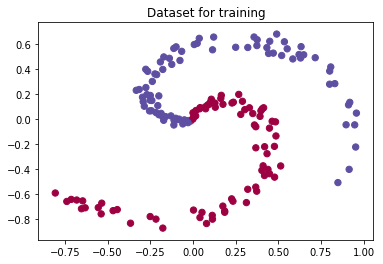

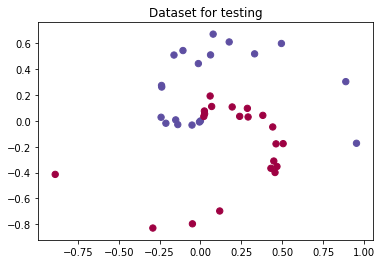

In [2]:
X_train,yhat_train,X_test,yhat_test = utils.create_simple_dataset()

# Logistic Regression using Scikit Learn

Create an instance of logistic regression using SGDClassifier with loss set to 'log', train the model and check the accuracy of the predictions

In [5]:
# Create an SGDClassifier object with loss set to log for logistic regression

# Go through the documentation and determine appropriate values for the parameters of SGDClassifier 
# for training a logistic regression model
logreg  = SGDClassifier(...)

# fit the model on the training set by calling the appropriate function
binclf = 

# Predict the class for the test set
predicted = 

# Determine the accuracy on test set and print it
acc = 
print("Accuracy on test set is")

0.675


In [6]:
class NeuralNet(nn.Module):
    """A Neural Network with a hidden layer"""
    def __init__(self, input_size,hidden_size,output_size):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.tanh = nn.Tanh()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        output = self.layer1(x)
        output = self.tanh(output)
        output = self.layer2(output)
        output = self.sigmoid(output)
        return output

In [7]:
input_size = 2
hidden_size = 5
output_size = 1
num_epochs = 1000

learning_rate = 0.05

model = NeuralNet(input_size,hidden_size, output_size)

lossFunction = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [8]:

X_train_var = Variable(torch.from_numpy(X_train.T).float(), requires_grad=False)
yhat_train_var = Variable(torch.from_numpy(yhat_train.T).float(),requires_grad=False)
X_test_var = Variable(torch.from_numpy(X_test.T).float(), requires_grad=False)
yhat_test_var = Variable(torch.from_numpy(yhat_test.T).float(),requires_grad=False)
for epoch in range(num_epochs):
    out = model(X_train_var)
    loss = lossFunction(out,yhat_train_var)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch%100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}' .format(epoch, num_epochs, loss.data[0]))


Epoch [0/1000], Loss: 0.7171
Epoch [100/1000], Loss: 0.1090
Epoch [200/1000], Loss: 0.0429
Epoch [300/1000], Loss: 0.0282
Epoch [400/1000], Loss: 0.0206
Epoch [500/1000], Loss: 0.0154
Epoch [600/1000], Loss: 0.0112
Epoch [700/1000], Loss: 0.0085
Epoch [800/1000], Loss: 0.0066
Epoch [900/1000], Loss: 0.0053


In [9]:
pred = model(X_test_var)
predicted = np.round(pred.data.numpy()).T
accuracy = np.mean(predicted == yhat_test)
accuracy

0.95